# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID', 'Mouse ID'])


# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(merged_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df['Mouse ID'][merged_df.duplicated(['Mouse ID', 'Timepoint'])].unique()




array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
after_drop_df = merged_df[merged_df['Mouse ID'] !='g989']
after_drop_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(after_drop_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groupby_drug_regimen = after_drop_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = groupby_drug_regimen.mean(numeric_only=True)['Tumor Volume (mm3)']
tumor_volume_median = groupby_drug_regimen.median(numeric_only=True)['Tumor Volume (mm3)']
tumor_volume_variance = groupby_drug_regimen.var(numeric_only=True)['Tumor Volume (mm3)']
tumor_volume_sd = groupby_drug_regimen.std(numeric_only=True)['Tumor Volume (mm3)']
tumor_volume_sem = groupby_drug_regimen.sem(numeric_only=True)['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean, "Median Tumor Volume": tumor_volume_median, "Tumor Volume Variance": tumor_volume_variance, "Tumor Volume Std. Dev.": tumor_volume_sd, "Tumor Volume Std. Err.": tumor_volume_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

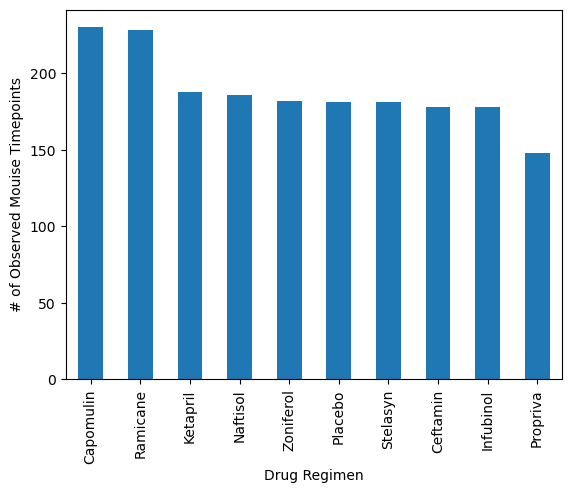

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
groupby_drug_regimen['Timepoint'].count().sort_values(ascending=False).plot(kind="bar")
plt.ylabel('# of Observed Mouise Timepoints')
plt.show()


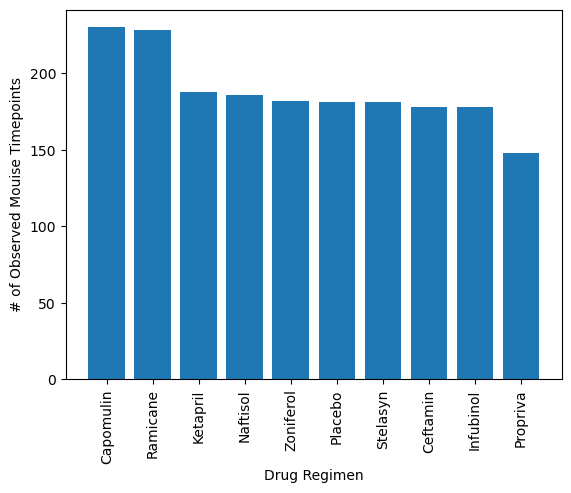

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df = pd.DataFrame(groupby_drug_regimen['Timepoint'].count().sort_values(ascending=False))
drug_regimen = df.index
timepoint = df['Timepoint']
x_axis = np.arange(0,len(drug_regimen))
tick_location = []
for x in x_axis:
    tick_location.append(x)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouise Timepoints")
plt.bar(x_axis, timepoint)
plt.xticks(tick_location, drug_regimen, rotation=90)

plt.show()

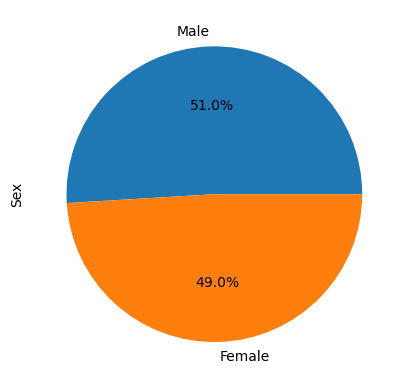

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
after_drop_df["Sex"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.show()

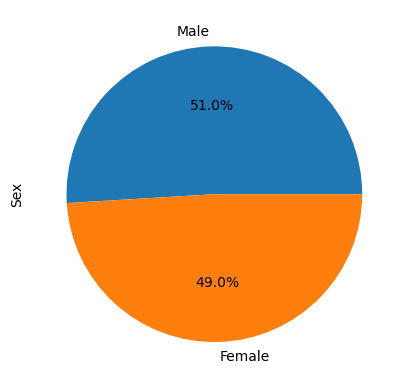

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_amount = after_drop_df["Sex"].value_counts().to_list()
sex = ["Male", "Female"]
plt.pie(sex_amount, labels=sex, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupby_mouse = after_drop_df.groupby("Mouse ID")
last_timepoint_by_mouse_df = pd.DataFrame(groupby_mouse["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_groupby_df = last_timepoint_by_mouse_df.merge(after_drop_df, on=["Mouse ID", "Mouse ID"])
rename_df = merged_groupby_df.rename(columns={"Timepoint_x": "Last Timepoint", "Timepoint_y": "Timepoint"})
set_index_df = rename_df.set_index(rename_df["Drug Regimen"]) 



In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    loc_df1 = set_index_df.loc[treatment]
    loc_df2 = loc_df1.loc[(loc_df1['Last Timepoint']==(loc_df1['Timepoint']))]
    tumor_volume_data.append(loc_df2["Tumor Volume (mm3)"])
    # add subset 
    quartiles = loc_df2["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_occupancy = loc_df2.loc[(loc_df2["Tumor Volume (mm3)"] < lower_bound) | (loc_df2["Tumor Volume (mm3)"] > upper_bound)]
    print(f"{treatment}'s potential outliers: {outlier_occupancy['Tumor Volume (mm3)']}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Drug Regimen
Infubinol    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


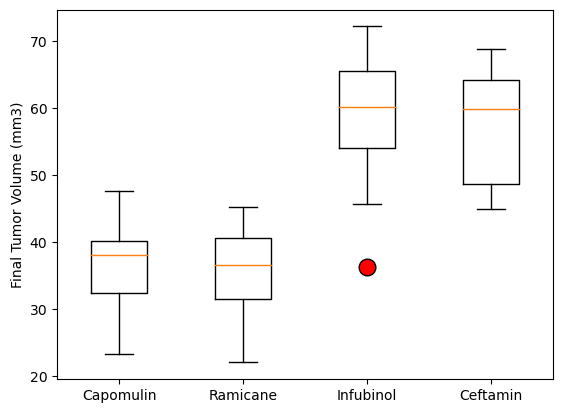

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='red', markersize=12)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume_data, flierprops=flierprops)
plt.xticks([1,2,3,4], treatments)

plt.show()

## Line and Scatter Plots

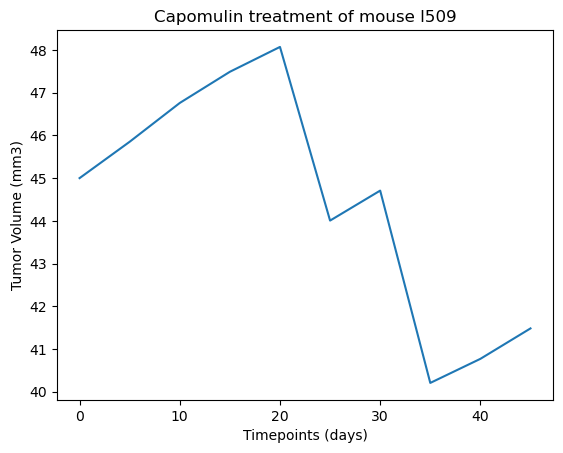

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_df = after_drop_df.loc[after_drop_df["Mouse ID"] == "l509"]
plt.plot(mouse_l509_df["Timepoint"], mouse_l509_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

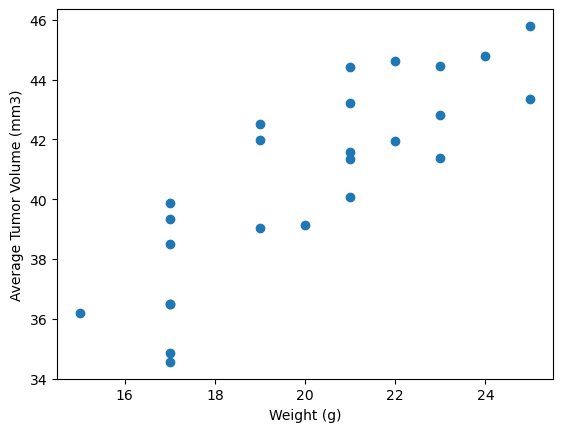

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = after_drop_df.loc[after_drop_df["Drug Regimen"] == "Capomulin"]
capomulin_groupby = capomulin_df.groupby("Mouse ID")
avg_tumor_volume = capomulin_groupby["Tumor Volume (mm3)"].mean()
weight = capomulin_groupby["Weight (g)"].max()
plt.scatter(weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


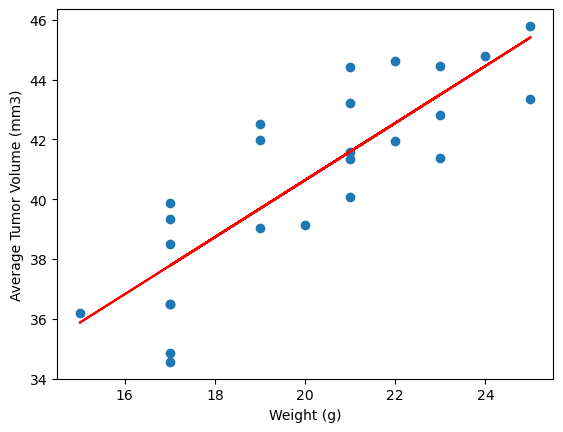

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_volume)
regress_values = weight * slope + intercept
plt.scatter(weight, avg_tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f'The correlation between mouse weight and the average tumor volume is {rvalue}')
plt.show()